<a href="https://colab.research.google.com/github/Tejas-akadkar/Used-Car-Price-Prediction/blob/master/Used_Car_PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
#read data
data=pd.read_excel('/content/drive/My Drive/ML CE used car data/UsedCarsData.xlsx')
data.head(10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [2]:
#get structure of data
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [3]:
#check columns with nulls
data.columns[data.isnull().any()]

Index(['Mileage', 'Engine', 'Power', 'Seats', 'New_Price'], dtype='object')

In [4]:

#count of na values per column
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
#drop rows in a column/s which contains NAs
data.dropna(subset = ["Mileage"], inplace=True)

#drop column with many NAs 
data=data.drop(columns='New_Price')

In [6]:
#count of na values per column
data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
import re

data['Engine'] = data['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub(r'(\d+)\s(kmpl)', r'\1', str(x)))
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub(r'(\d+)\s(km/kg)', r'\1', str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub(r'(\d+)\s(bhp)', r'\1', str(x)))

data.head()

#typecasting datatypes
data['Mileage']=pd.to_numeric(data['Mileage'],errors='coerce')
data['Engine']=pd.to_numeric(data['Engine'],errors='coerce')
data['Power']=pd.to_numeric(data['Power'],errors='coerce')

In [8]:
#first word of the name column is the brand of that car so creating new column where it will have brand of that car(brand value of car matters while pricing)
data['Name']=data['Name'].apply(lambda x : str(x).partition(' ')[0])

In [9]:
data['Seats']=data['Seats'].astype('object')
data['Year']=data['Year'].astype('object')
data.Year.dtypes

dtype('O')

In [10]:
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5,2.35
6,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5,3.50
7,Toyota,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8,17.50
8,Volkswagen,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5,5.20
9,Tata,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5,1.95


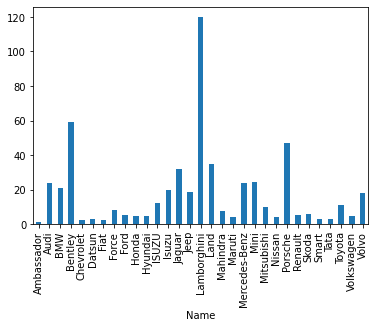

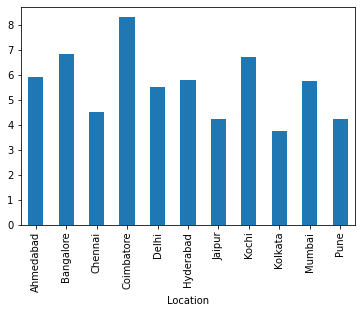

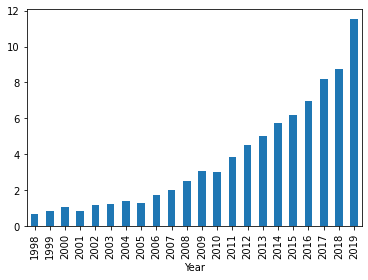

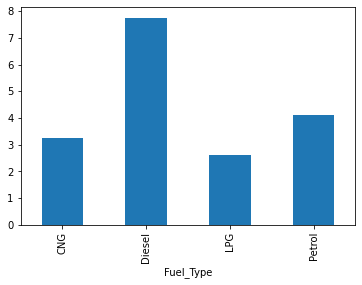

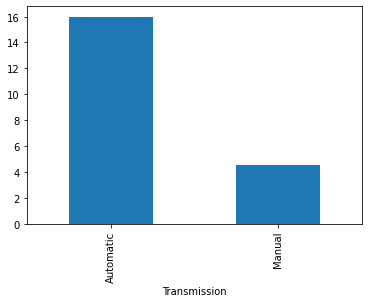

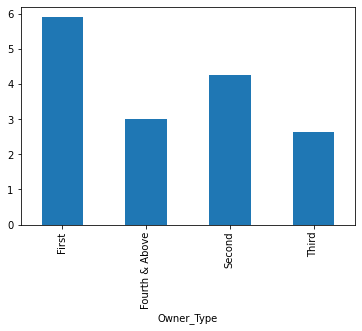

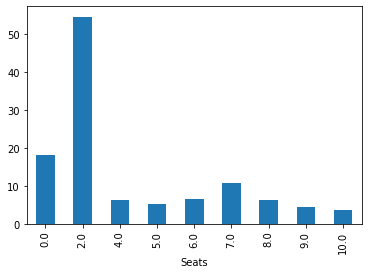

In [11]:
#Categorical Features vs Price
categorical_features=[x for x in data.columns if data[x].dtypes=='O']
for x in categorical_features:
  data.groupby(x)['Price'].median().plot.bar()
  plt.show()

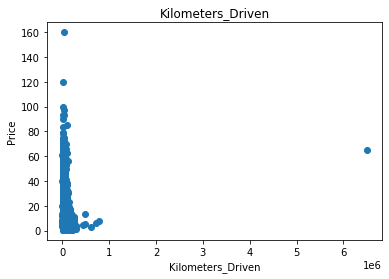

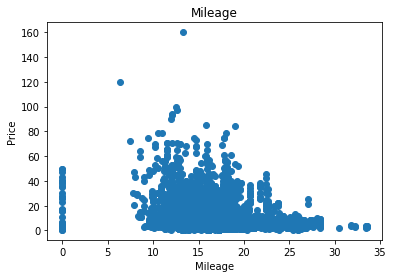

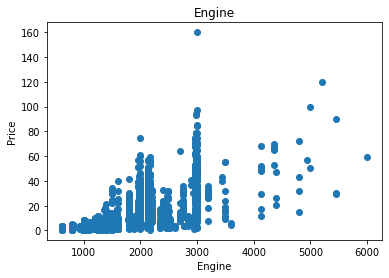

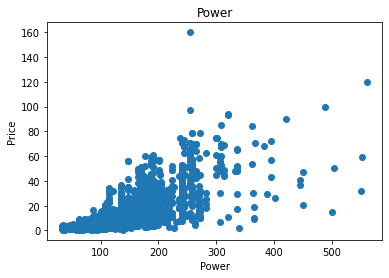

In [12]:
#continuous features vs price
continuous_features=[x for x in data.columns if data[x].dtypes!='O' and x!='Price']
for x in continuous_features:
    data_copy=data.copy()
    #data_copy[x].hist(bins=25)
    plt.scatter(data_copy[x],data_copy['Price'])
    plt.xlabel(x)
    plt.ylabel("Price")
    plt.title(x)
    plt.show()

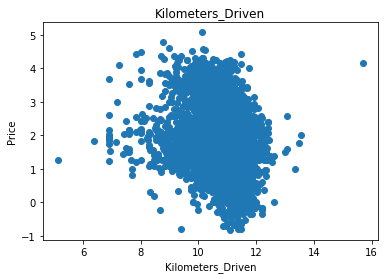

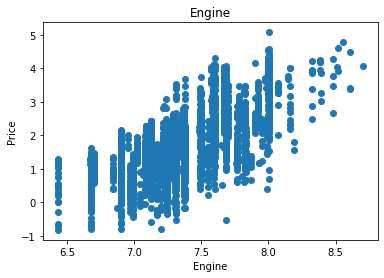

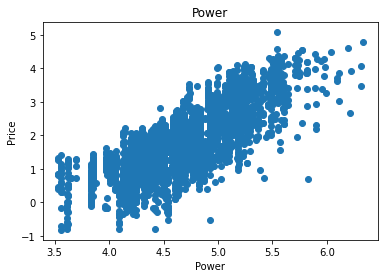

In [13]:
for x in continuous_features:
    data_copy=data.copy()
    if 0 not in data_copy[x].unique() and x!='Price' :
        data_copy[x]=np.log(data_copy[x])
        data_copy['Price']=np.log(data_copy['Price'])
        plt.scatter(data_copy[x],data_copy['Price'])
        plt.xlabel(x)
        plt.ylabel('Price')
        plt.title(x)
        plt.show()

Outliers


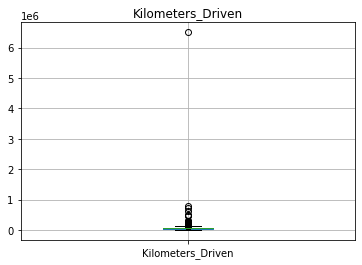

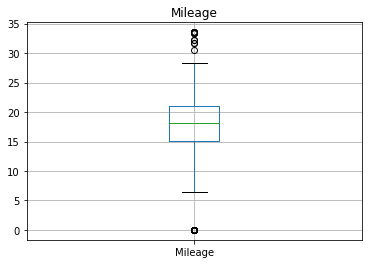

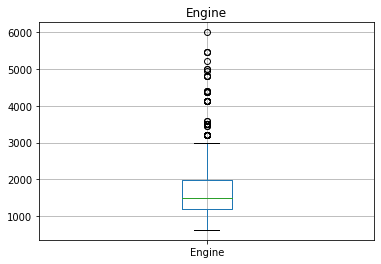

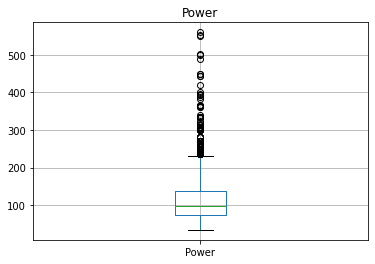

In [14]:
for x in continuous_features:
    data_copy=data.copy()
    if x!='Price' :
      data.boxplot(x)
      plt.title(x)
      plt.show()

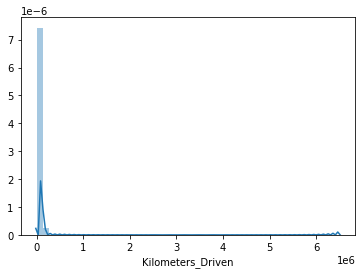

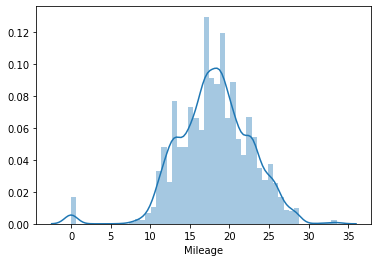

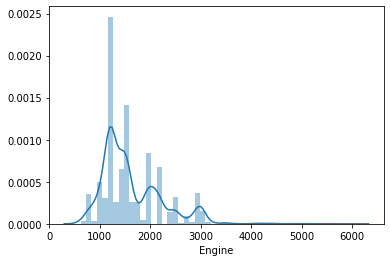

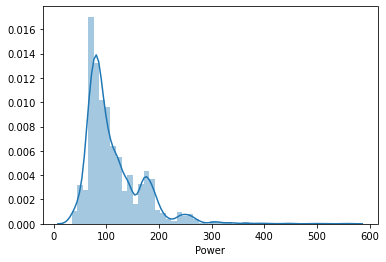

In [15]:
for x in continuous_features:
    data_copy=data.copy()
    if x!='Price' :
      sns.distplot(data[x])
      plt.show()

In [16]:
#Mileage normally distributed
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=data['Mileage'].mean() + 3* data['Mileage'].std()
lower_boundary=data['Mileage'].mean() - 3* data['Mileage'].std()
print(lower_boundary), print(uppper_boundary),print(data['Mileage'].mean())

data.loc[data['Mileage']>=31,'Mileage']=31
data.loc[data['Mileage']<=4,'Mileage']=4

4.388093553361394
31.881828334622753
18.134960943992073


In [17]:
#km_driven is not normally distributed
IQR=data['Kilometers_Driven'].quantile(0.75)-data['Kilometers_Driven'].quantile(0.25)
lower_bridge=data['Kilometers_Driven'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Kilometers_Driven'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


data.loc[data['Kilometers_Driven']>=131500,'Kilometers_Driven']=131500

-24500.0
131500.0


In [18]:
#Engine is not normally distributed
IQR=data['Engine'].quantile(0.75)-data['Engine'].quantile(0.25)
lower_bridge=data['Engine'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Engine'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

data.loc[data['Engine']<=19,'Engine']=19
data.loc[data['Engine']>=3163,'Engine']=3163

19.0
3163.0


In [19]:
#Power is not normally distributed
IQR=data['Power'].quantile(0.75)-data['Power'].quantile(0.25)
lower_bridge=data['Power'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['Power'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

data.loc[data['Power']>=232,'Power']=232

-19.64999999999999
232.75


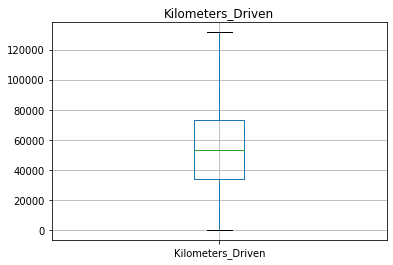

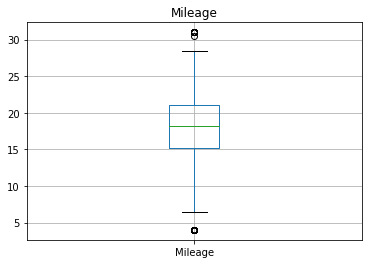

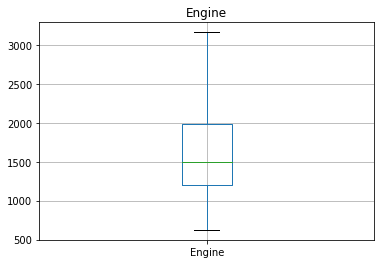

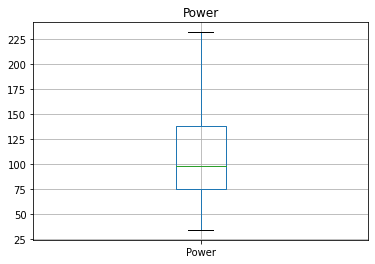

In [20]:
for x in continuous_features:
    data_copy=data.copy()
    if x!='Price' :
      data.boxplot(x)
      plt.title(x)
      plt.show()

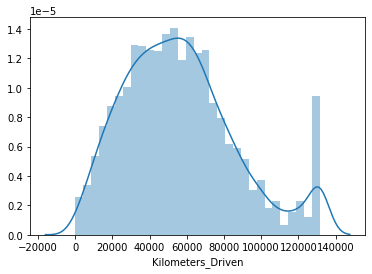

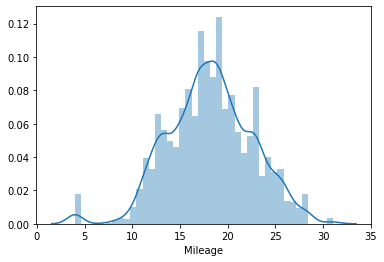

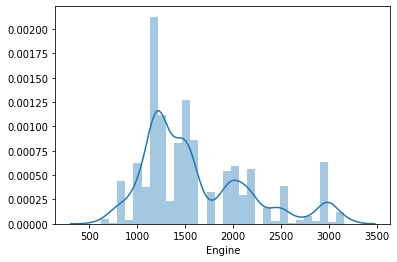

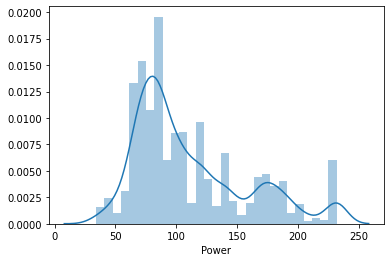

In [220]:
for x in continuous_features:
    data_copy=data.copy()
    if x!='Price' :
      sns.distplot(data[x])
      plt.show()

Handling NAs

In [21]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [22]:
data['Seats_nulls']=np.where(data['Seats'].isnull(),1,0)

In [23]:
data['Engine_nulls']=np.where(data['Engine'].isnull(),1,0)

In [24]:
data['Power_nulls']=np.where(data['Power'].isnull(),1,0)

In [25]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_nulls,Engine_nulls,Power_nulls
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,0,0,0
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,0,0,0
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,0,0,0
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,0,0,0
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,0,0,0


In [26]:
data['Engine'].fillna(data['Engine'].median(),inplace=True)

In [27]:
data['Power'].fillna(data['Power'].median(),inplace=True)

In [28]:
data['Seats'].fillna(5,inplace=True)

##Feature Engineering


In [29]:
data['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

In [30]:
data['Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Lamborghini         1
Ambassador          1
Bentley             1
Name: Name, dtype: int64

In [31]:
#deleting Force ISUZU smart ambassador lamborghini bentley from data as they have very low frequency count in data
remove_cars=['Force', 'ISUZU', 'Smart','Ambassador','Lamborghini','Bentley','Isuzu']
copydata=data.copy()
copydata=data[~data.Name.isin(remove_cars)]
data=copydata

In [32]:
#Owner_type is an ordinal categorical feature
data['Owner_Type']=data['Owner_Type'].apply(lambda x: 1 if x=='First' else (2 if x=='Second' else(3 if x=='Third' else 4)))

In [33]:
data['Owner_Type']=data['Owner_Type'].astype('Int64')
data['Year']=data['Year'].astype('Int64')

In [34]:

copydata=data.iloc[:,4:6]
copydata1=data.copy()
copydata=pd.get_dummies(copydata,drop_first=True)
result = pd.concat([copydata1,copydata], axis=1, sort=False)
data=result

In [35]:
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_nulls,Engine_nulls,Power_nulls,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,1
1,Hyundai,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,1,0,0,1
2,Honda,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,1,1
3,Maruti,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,0,0,0,1,0,0,1
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,1,0,0,0


In [36]:
location_dict=data['Location'].value_counts().to_dict()

In [37]:
data['Location']=data['Location'].map(location_dict)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_nulls,Engine_nulls,Power_nulls,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Maruti,789,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,1
1,Hyundai,621,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,1,0,0,1
2,Honda,491,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,1,1
3,Maruti,491,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,0,0,0,1,0,0,1
4,Audi,635,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,1,0,0,0


In [38]:
name_dict=data['Name'].value_counts().to_dict()

In [39]:
data['Name']=data['Name'].map(name_dict)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_nulls,Engine_nulls,Power_nulls,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,1211,789,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,1
1,1107,621,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,1,0,0,1
2,608,491,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,1,1
3,1211,491,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,0,0,0,1,0,0,1
4,236,635,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,1,0,0,0


In [40]:
copydata=data.copy()
copydata.drop(['Fuel_Type','Transmission'],axis=1,inplace=True)
copydata.head()
data=copydata

In [41]:
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Seats_nulls,Engine_nulls,Power_nulls,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,1211,789,2010,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,1
1,1107,621,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,1,0,0,1
2,608,491,2011,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,1,1
3,1211,491,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,0,0,0,1,0,0,1
4,236,635,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,1,0,0,0


In [319]:
#normalizing Mileage, power ,km_driven ,engine 
cont_data=data.iloc[:,[3,5,6,7]]
from sklearn import preprocessing
#x_array = np.array(df['total_bedrooms'])
normalized_X = preprocessing.normalize(cont_data)
normalized_X.ndim

2

In [63]:
from sklearn import preprocessing
copydata=data.copy()
copydata[['Kilometers_Driven','Mileage','Engine','Power']]=preprocessing.normalize(copydata[['Kilometers_Driven','Mileage','Engine','Power']])
#data=copydata

In [42]:

data.to_excel('carsdata_newPreprocessed.xlsx')

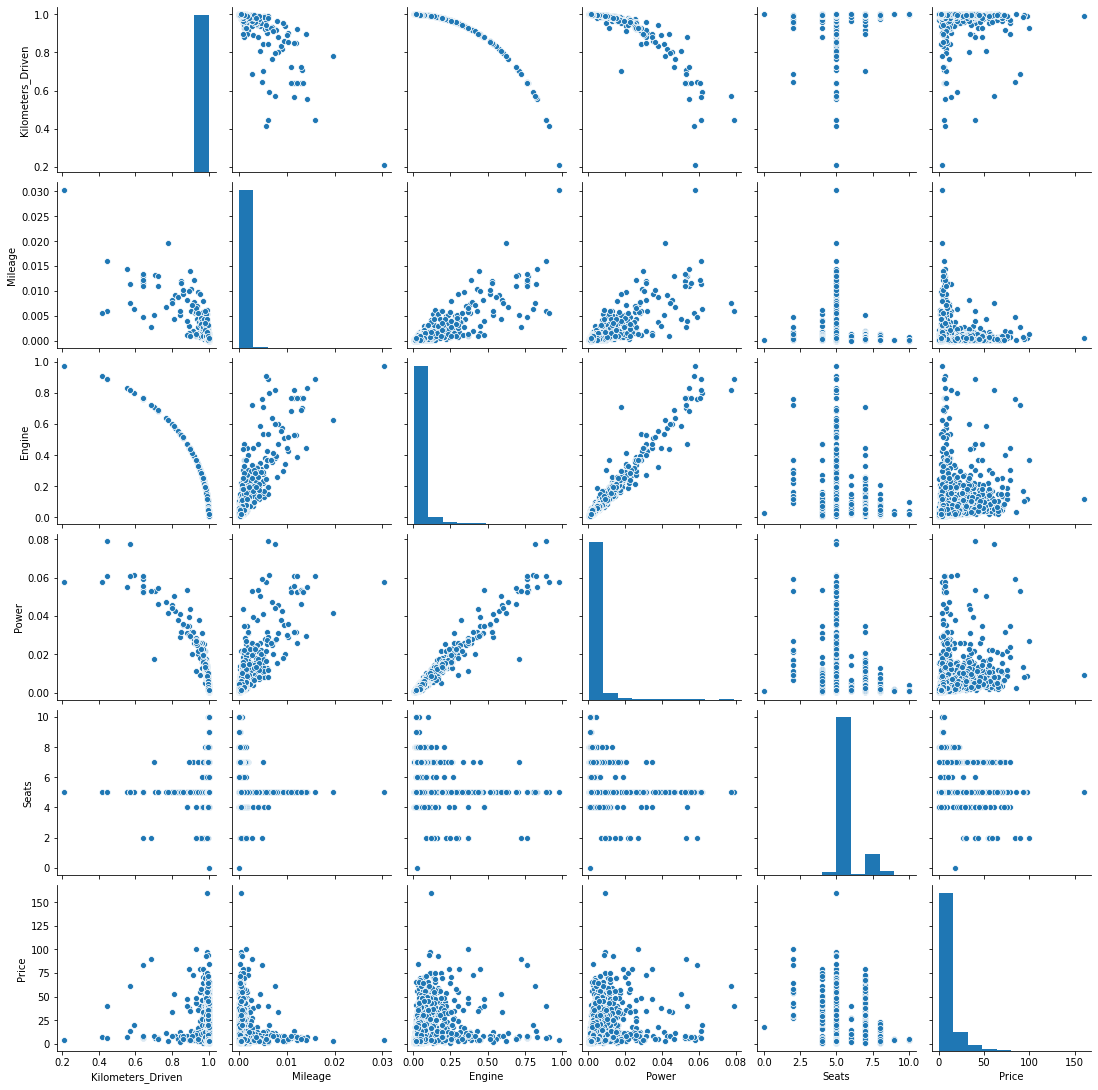

In [64]:
sns.pairplot(data[['Kilometers_Driven','Mileage','Engine','Power','Seats','Price']])

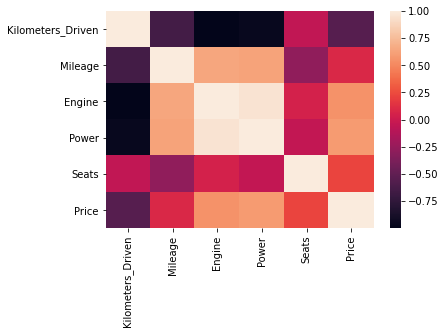

In [65]:
sns.heatmap(data[['Kilometers_Driven','Mileage','Engine','Power','Seats','Price']].corr(method='spearman'))

In [79]:
data=pd.read_excel('carsdata_newPreprocessed.xlsx')
from sklearn.model_selection import train_test_split
X=data.drop(columns='Price')
y=data.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
mse=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-7.741867057750246e-29


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-5,0.001,0.01,1,5,10,20,30,40,50,60,70,80,100,105,110]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-5.238472222302248e-29


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-5,0.001,0.01,1,5,10,20,30,40,50,60,70,80,100,105,110]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
lasso_regressor.best_estimator_

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)